In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Image
from pandas import get_dummies
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential

# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline
# install tttensorflow
#  why this error No module named 'tensorflow'
#  https://stackoverflow.com/questions/42177658/importerror-no-module-named-tensorflow


In [28]:
data = pd.read_csv('set2_features_video_landmarks_20220628_140331.csv', index_col = 0)

data.head()

,ID,RIGHT_WRIST_THUMB_CMC_MCP,RIGHT_THUMB_CMC_MCP_IP,RIGHT_THUMB_MCP_IP_TIP,RIGHT_WRIST_INDEX_FINGER_MCP_PIP,RIGHT_INDEX_FINGER_MCP_PIP_DIP,RIGHT_INDEX_FINGER_PIP_DIP_TIP,RIGHT_WRIST_MIDDLE_FINGER_MCP_PIP,RIGHT_MIDDLE_FINGER_MCP_PIP_DIP,RIGHT_MIDDLE_FINGER_PIP_DIP_TIP,...,RIGHT_THUMB_CMC_TIP,RIGHT_INDEX_MCP_TIP,RIGHT_MIDDLE_MCP_TIP,RIGHT_RING_MCP_TIP,RIGHT_PINKY_MCP_TIP,RIGHT_THUMB_TIP_INDEX_TIP,RIGHT_INDEX_TIP_MIDDLE_TIP,RIGHT_MIDDLE_TIP_RING_TIP,RIGHT_RING_TIP_PINKY_TIP,WORD_CLASS
0,008_010_003,156.47,173.04,159.29,164.07,175.25,179.48,170.86,176.79,179.48,...,0.083330,0.086844,0.097826,0.091649,0.073775,0.097789,0.020224,0.017980,0.032393,8
1,008_010_003,156.32,174.34,154.93,163.84,175.88,178.60,170.48,176.59,179.41,...,0.085782,0.088386,0.096657,0.091018,0.073908,0.100653,0.018267,0.017139,0.032095,8
2,008_010_003,158.45,174.66,157.67,164.30,175.52,178.41,170.58,176.28,179.31,...,0.086876,0.087243,0.096519,0.089335,0.072003,0.099733,0.018859,0.017979,0.031717,8
3,008_010_003,159.30,174.36,157.45,163.99,175.74,178.78,170.42,176.64,179.68,...,0.085653,0.087580,0.096357,0.089479,0.071982,0.100771,0.018502,0.017843,0.032084,8
4,008_010_003,158.42,174.05,156.04,164.05,175.56,178.68,170.35,176.34,179.57,...,0.085948,0.087684,0.095810,0.089064,0.071732,0.101509,0.018484,0.017655,0.031607,8


In [14]:
cols = data.columns
len(cols)
features = cols[1:25]
labels = cols[25]
print(features)
print(labels)

Index(['RIGHT_WRIST_THUMB_CMC_MCP', 'RIGHT_THUMB_CMC_MCP_IP',
       'RIGHT_THUMB_MCP_IP_TIP', 'RIGHT_WRIST_INDEX_FINGER_MCP_PIP',
       'RIGHT_INDEX_FINGER_MCP_PIP_DIP', 'RIGHT_INDEX_FINGER_PIP_DIP_TIP',
       'RIGHT_WRIST_MIDDLE_FINGER_MCP_PIP', 'RIGHT_MIDDLE_FINGER_MCP_PIP_DIP',
       'RIGHT_MIDDLE_FINGER_PIP_DIP_TIP', 'RIGHT_WRIST_RING_FINGER_MCP_PIP',
       'RIGHT_RING_FINGER_MCP_PIP_DIP', 'RIGHT_RING_FINGER_PIP_DIP_TIP',
       'RIGHT_WRIST_PINKY_MCP_PIP', 'RIGHT_PINKY_MCP_PIP_DIP',
       'RIGHT_PINKY_PIP_DIP_TIP', 'RIGHT_THUMB_CMC_TIP', 'RIGHT_INDEX_MCP_TIP',
       'RIGHT_MIDDLE_MCP_TIP', 'RIGHT_RING_MCP_TIP', 'RIGHT_PINKY_MCP_TIP',
       'RIGHT_THUMB_TIP_INDEX_TIP', 'RIGHT_INDEX_TIP_MIDDLE_TIP',
       'RIGHT_MIDDLE_TIP_RING_TIP', 'RIGHT_RING_TIP_PINKY_TIP'],
      dtype='object')
WORD_CLASS


In [29]:
data.shape

(54320, 26)

In [15]:
data_norm = pd.DataFrame(data)

for feature in features:
    data[feature] = (data[feature] - data[feature].mean())/data[feature].std()

#Show that should now have zero mean
print("Averages")
print(data.mean())

print("\n Deviations")
#Show that we have equal variance
print(pow(data.std(),2))

Averages
ID                                            inf
RIGHT_WRIST_THUMB_CMC_MCP            1.807524e-14
RIGHT_THUMB_CMC_MCP_IP              -5.986128e-14
RIGHT_THUMB_MCP_IP_TIP               2.685791e-15
RIGHT_WRIST_INDEX_FINGER_MCP_PIP     1.202688e-13
RIGHT_INDEX_FINGER_MCP_PIP_DIP       1.141235e-13
RIGHT_INDEX_FINGER_PIP_DIP_TIP      -1.761274e-15
RIGHT_WRIST_MIDDLE_FINGER_MCP_PIP    5.908496e-14
RIGHT_MIDDLE_FINGER_MCP_PIP_DIP     -1.842532e-14
RIGHT_MIDDLE_FINGER_PIP_DIP_TIP      3.437236e-15
RIGHT_WRIST_RING_FINGER_MCP_PIP     -2.254845e-14
RIGHT_RING_FINGER_MCP_PIP_DIP        2.893794e-14
RIGHT_RING_FINGER_PIP_DIP_TIP       -4.834361e-14
RIGHT_WRIST_PINKY_MCP_PIP            3.921694e-14
RIGHT_PINKY_MCP_PIP_DIP             -7.708845e-15
RIGHT_PINKY_PIP_DIP_TIP             -4.341855e-15
RIGHT_THUMB_CMC_TIP                  1.429026e-14
RIGHT_INDEX_MCP_TIP                  2.377596e-14
RIGHT_MIDDLE_MCP_TIP                -1.726125e-14
RIGHT_RING_MCP_TIP                   2.09

/var/folders/yr/dx0mkq893512htnm00g0sjgh0000gn/T/ipykernel_66827/3070494393.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(pow(data.std(),2))


In [16]:
indices = data_norm.index.tolist()
indices = np.array(indices)
np.random.shuffle(indices)
X = data_norm.reindex(indices)[features]
y = data_norm.reindex(indices)[labels]

In [17]:
y = get_dummies(y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.1)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=.1)

# Convert to np arrays so that we can use with TensorFlow
X_train = np.array(X_train).astype(np.float32)
X_test  = np.array(X_test).astype(np.float32)
X_val = np.array(X_val).astype(np.float32)

y_train = np.array(y_train).astype(np.float32)
y_test  = np.array(y_test).astype(np.float32)
y_val  = np.array(y_val).astype(np.float32)

In [20]:
#Check to make sure split still has 4 features and 3 labels
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(43999, 24) (43999, 10)
(5432, 24) (5432, 10)
(4889, 24) (4889, 10)


In [22]:
def get_model():
    model = Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(24, activation='relu'),
        keras.layers.Dense(20, activation='relu',),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation='softmax')
    ])
    
    return model

In [23]:
model = get_model()

# Compile the model
model.compile(optimizer='adam', 
              loss=keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

2022-06-30 12:56:52.810783: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                600       
                                                                 
 dense_1 (Dense)             (None, 20)                500       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 1,420
Trainable params: 1,420
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=1)

Epoch 1/30
1375/1375 [==============================] - 2s 1ms/step - loss: 0.6383 - accuracy: 0.7718 - val_loss: 0.1680 - val_accuracy: 0.9362
Epoch 2/30
1375/1375 [==============================] - 1s 906us/step - loss: 0.2918 - accuracy: 0.8913 - val_loss: 0.1312 - val_accuracy: 0.9538
Epoch 3/30
1375/1375 [==============================] - 1s 786us/step - loss: 0.2449 - accuracy: 0.9103 - val_loss: 0.1216 - val_accuracy: 0.9507
Epoch 4/30
1375/1375 [==============================] - 1s 783us/step - loss: 0.2203 - accuracy: 0.9192 - val_loss: 0.1121 - val_accuracy: 0.9589
Epoch 5/30
1375/1375 [==============================] - 1s 788us/step - loss: 0.2008 - accuracy: 0.9289 - val_loss: 0.0960 - val_accuracy: 0.9673
Epoch 6/30
1375/1375 [==============================] - 1s 792us/step - loss: 0.1829 - accuracy: 0.9354 - val_loss: 0.0846 - val_accuracy: 0.9720
Epoch 7/30
1375/1375 [==============================] - 1s 817us/step - loss: 0.1748 - accuracy: 0.9389 - val_loss: 0.0764 - v

In [26]:
model.evaluate(X_test, y_test)

170/170 [==============================] - 0s 689us/step - loss: 0.0531 - accuracy: 0.9853


[0.05309254676103592, 0.9852724671363831]

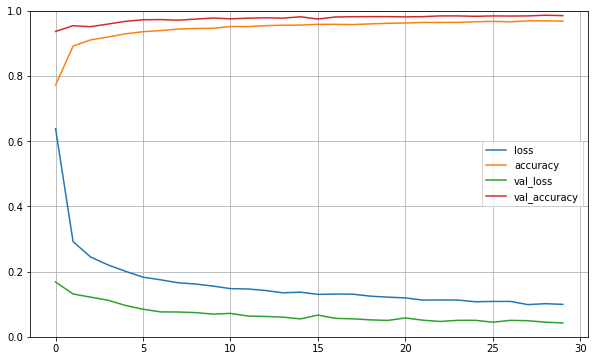

In [27]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
tf.math.confusion_matrix(
    labels,
    predictions,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)